## Data Cleaning - Deal with structural errors, transformation and standardization..
## Data Manipulation - concatenate and merge the data.

### import libraries

In [11]:
import numpy as np
import pandas as pd

### importing the data set

In [8]:
data = pd.read_excel(r"C:\Users\subha\Downloads\data.xlsx", sheet_name = 0)
data1 = pd.read_excel(r"C:\Users\subha\Downloads\data.xlsx",sheet_name = 1)

In [10]:
data

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,United Kingdom
1,536365,71053,WHITE METAL LANTERN,#6,3.39,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,4.23,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,5.07,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,5.91,United Kingdom
...,...,...,...,...,...,...
229,536390,21485,RETROSPOT HEART HOT WATER BOTTLE,24,4.25,United Kingdom
230,536390,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,24,3.39,United Kingdom
231,536390,84030E,ENGLISH ROSE HOT WATER BOTTLE,24,3.75,United Kingdom
232,536390,22174,PHOTO CUBE,48,1.48,United Kingdom


In [12]:
data1

,InvoiceNo,CustomerID
0,536365,17850.0
1,536365,17850.0
2,536365,17850.0
3,536365,17850.0
4,536365,17850.0
...,...,...
541904,581587,12680.0
541905,581587,12680.0
541906,581587,12680.0
541907,581587,12680.0


## structural errors

In [13]:
data["Quantity"] = data["Quantity"].replace(r'[#&* -]','',regex = True)
data["Quantity"]

0       6
1       6
2       8
3       6
4       6
       ..
229    24
230    24
231    24
232    48
233    96
Name: Quantity, Length: 234, dtype: object

## Transformation

In [14]:
data["UnitPrice"].isna().sum()

0

In [15]:
data["UnitPrice"].mean(),data["UnitPrice"].median()

(3.5843589743589743, 2.55)

<Axes: ylabel='Density'>

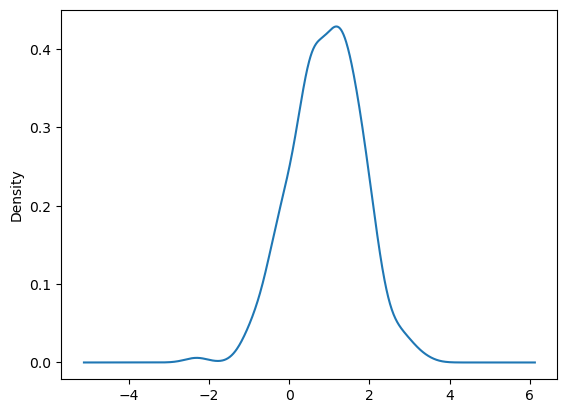

In [16]:
np.log(data["UnitPrice"]).plot(kind = "kde")   # log

<Axes: ylabel='Density'>

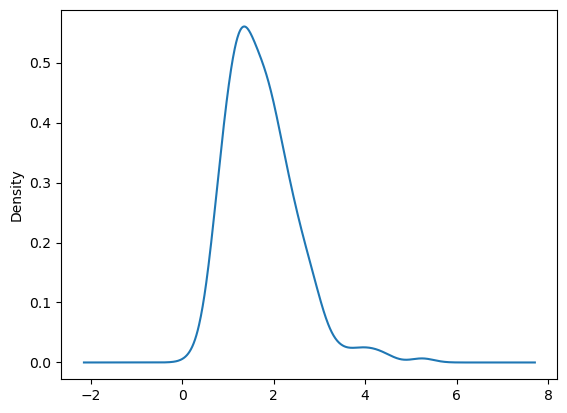

In [17]:
np.sqrt(data["UnitPrice"]).plot(kind = "kde")  # sqrt

## Standardization

In [18]:
data["Quantity"].dtype

dtype('O')

In [19]:
data["Quantity"] = data["Quantity"].astype("int32")

In [20]:
def stand(x):
    n= (x - data["Quantity"].mean())/data["Quantity"].std()
    return n

In [21]:
data["Quantity"] = data["Quantity"].apply(stand)
data["Quantity"]

0     -0.329666
1     -0.329666
2     -0.291383
3     -0.329666
4     -0.329666
         ...   
229    0.014888
230    0.014888
231    0.014888
232    0.474294
233    1.393106
Name: Quantity, Length: 234, dtype: float64

## concatenate

In [22]:
pd.concat([data,data1],axis = 0,ignore_index = True)

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,Country,CustomerID
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,-0.329666,2.55,United Kingdom,NaN
1,536365,71053,WHITE METAL LANTERN,-0.329666,3.39,United Kingdom,NaN
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,-0.291383,4.23,United Kingdom,NaN
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,-0.329666,5.07,United Kingdom,NaN
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,-0.329666,5.91,United Kingdom,NaN
...,...,...,...,...,...,...,...
542138,581587,NaN,NaN,NaN,NaN,NaN,12680.0
542139,581587,NaN,NaN,NaN,NaN,NaN,12680.0
542140,581587,NaN,NaN,NaN,NaN,NaN,12680.0
542141,581587,NaN,NaN,NaN,NaN,NaN,12680.0


In [23]:
pd.concat([data,data1],axis = 1,ignore_index = True)

,0,1,2,3,4,5,6,7
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,-0.329666,2.55,United Kingdom,536365,17850.0
1,536365,71053,WHITE METAL LANTERN,-0.329666,3.39,United Kingdom,536365,17850.0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,-0.291383,4.23,United Kingdom,536365,17850.0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,-0.329666,5.07,United Kingdom,536365,17850.0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,-0.329666,5.91,United Kingdom,536365,17850.0
...,...,...,...,...,...,...,...,...
541904,NaN,NaN,NaN,NaN,NaN,NaN,581587,12680.0
541905,NaN,NaN,NaN,NaN,NaN,NaN,581587,12680.0
541906,NaN,NaN,NaN,NaN,NaN,NaN,581587,12680.0
541907,NaN,NaN,NaN,NaN,NaN,NaN,581587,12680.0


## merge()

In [24]:
pd.merge(data,data1,on = "InvoiceNo")  # inner

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,Country,CustomerID
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,-0.329666,2.55,United Kingdom,17850.0
1,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,-0.329666,2.55,United Kingdom,17850.0
2,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,-0.329666,2.55,United Kingdom,17850.0
3,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,-0.329666,2.55,United Kingdom,17850.0
4,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,-0.329666,2.55,United Kingdom,17850.0
...,...,...,...,...,...,...,...
4064,536390,22969,HOMEMADE JAM SCENTED CANDLES,1.393106,1.25,United Kingdom,17511.0
4065,536390,22969,HOMEMADE JAM SCENTED CANDLES,1.393106,1.25,United Kingdom,17511.0
4066,536390,22969,HOMEMADE JAM SCENTED CANDLES,1.393106,1.25,United Kingdom,17511.0
4067,536390,22969,HOMEMADE JAM SCENTED CANDLES,1.393106,1.25,United Kingdom,17511.0


In [25]:
pd.merge(data,data1,on = "InvoiceNo",how = "outer") # outer

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,Country,CustomerID
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,-0.329666,2.55,United Kingdom,17850.0
1,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,-0.329666,2.55,United Kingdom,17850.0
2,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,-0.329666,2.55,United Kingdom,17850.0
3,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,-0.329666,2.55,United Kingdom,17850.0
4,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,-0.329666,2.55,United Kingdom,17850.0
...,...,...,...,...,...,...,...
545738,581587,NaN,NaN,NaN,NaN,NaN,12680.0
545739,581587,NaN,NaN,NaN,NaN,NaN,12680.0
545740,581587,NaN,NaN,NaN,NaN,NaN,12680.0
545741,581587,NaN,NaN,NaN,NaN,NaN,12680.0


In [26]:
pd.merge(data,data1,on = "InvoiceNo",how = "right") # right

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,Country,CustomerID
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,-0.329666,2.55,United Kingdom,17850.0
1,536365,71053,WHITE METAL LANTERN,-0.329666,3.39,United Kingdom,17850.0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,-0.291383,4.23,United Kingdom,17850.0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,-0.329666,5.07,United Kingdom,17850.0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,-0.329666,5.91,United Kingdom,17850.0
...,...,...,...,...,...,...,...
545738,581587,NaN,NaN,NaN,NaN,NaN,12680.0
545739,581587,NaN,NaN,NaN,NaN,NaN,12680.0
545740,581587,NaN,NaN,NaN,NaN,NaN,12680.0
545741,581587,NaN,NaN,NaN,NaN,NaN,12680.0


In [27]:
pd.merge(data,data1,on = "InvoiceNo",how = "left")  # left

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,Country,CustomerID
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,-0.329666,2.55,United Kingdom,17850.0
1,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,-0.329666,2.55,United Kingdom,17850.0
2,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,-0.329666,2.55,United Kingdom,17850.0
3,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,-0.329666,2.55,United Kingdom,17850.0
4,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,-0.329666,2.55,United Kingdom,17850.0
...,...,...,...,...,...,...,...
4064,536390,22969,HOMEMADE JAM SCENTED CANDLES,1.393106,1.25,United Kingdom,17511.0
4065,536390,22969,HOMEMADE JAM SCENTED CANDLES,1.393106,1.25,United Kingdom,17511.0
4066,536390,22969,HOMEMADE JAM SCENTED CANDLES,1.393106,1.25,United Kingdom,17511.0
4067,536390,22969,HOMEMADE JAM SCENTED CANDLES,1.393106,1.25,United Kingdom,17511.0
